In [1]:
import pandas as pd

In [2]:
df_train = pd.read_csv('mnist_train.csv')
df_test = pd.read_csv('mnist_test.csv')

In [3]:
df_train.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df_train.shape

(60000, 785)

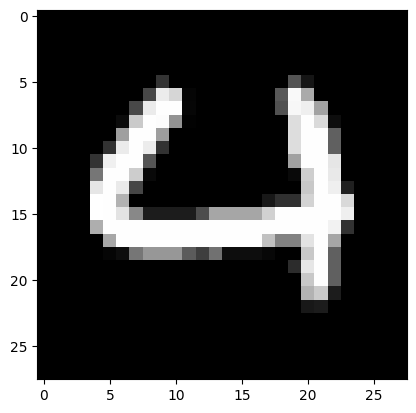

In [5]:
# show the 60th image
from matplotlib import pyplot as plt

img_no = 60
img = df_train.iloc[img_no,1:].values
img = img.reshape(28,28)
plt.imshow(img)
plt.gray()
plt.show()

In [6]:
# separate x & y
x_train = df_train.drop(columns='label').values
y_train = df_train[['label']]

x_test = df_test.drop(columns='label').values
y_test = df_test[['label']]

In [7]:
# normalize inputs
print(f'X Max {x_train.max()}\nX Min {x_train.min()}')
x_train = x_train/255  # scaling data to be between 0-1 by dividing by the max
x_test = x_test/255  # scaling data to be between 0-1 by dividing by the max

X Max 255
X Min 0


In [8]:
# Need to perform encoding on the output label
y_train=pd.get_dummies(y_train, columns=['label'])
y_test=pd.get_dummies(y_test, columns=['label'])

In [9]:
# import Neural Netowork Models & Layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

2023-02-12 10:58:38.791223: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Define model architecture
model = Sequential()
model.add(Input(shape=(None,784)))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(10,activation='softmax'))

2023-02-12 10:58:43.096575: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [11]:
# compile the model - select loss function 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [12]:
# print the model structure
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, None, 256)         200960    
                                                                 
 dense_1 (Dense)             (None, None, 128)         32896     
                                                                 
 dense_2 (Dense)             (None, None, 10)          1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit the model
from livelossplot import PlotLossesKerasTF

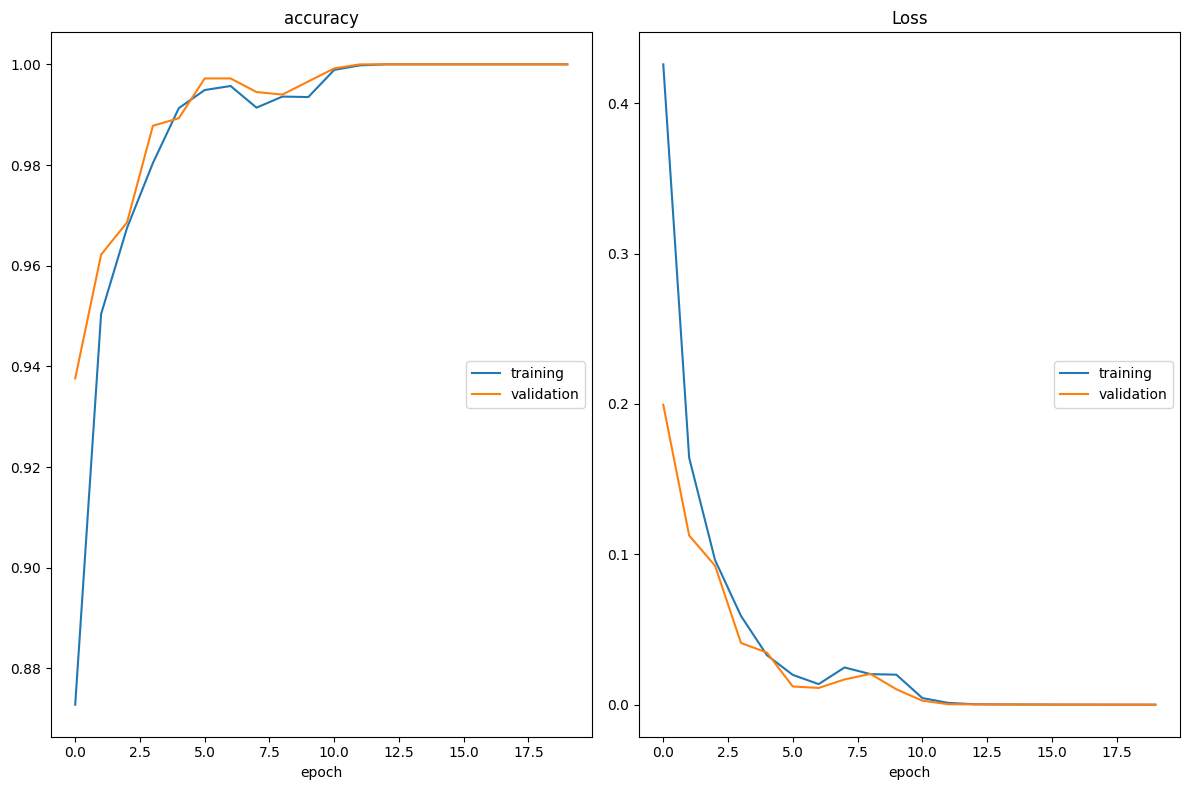

accuracy
	training         	 (min:    0.873, max:    1.000, cur:    1.000)
	validation       	 (min:    0.938, max:    1.000, cur:    1.000)
Loss
	training         	 (min:    0.000, max:    0.426, cur:    0.000)
	validation       	 (min:    0.000, max:    0.199, cur:    0.000)
313/313 [==============================] - 1s 4ms/step - loss: 7.6626e-05 - accuracy: 1.0000 - val_loss: 6.2974e-05 - val_accuracy: 1.0000


In [14]:
model.fit(x_test,y_test,epochs=20,callbacks=[PlotLossesKerasTF()],validation_data=(x_test,y_test))

In [ ]:
!pip install pydot

In [15]:
from tensorflow.keras.utils import plot_model

In [16]:
plot_model(model,to_file='model.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
